# Homework 5
***

**Name**: Sasi Jyothirmai Bonu

***

This assignment is due on Gradescope by **Friday April 12 at 5:59PM**. If you submit the assignment  by this deadline, you will receive 5 bonus points. If you need a little extra time, you may submit your work by **Monday April 15 at 5:59PM**. Your solutions to theoretical questions should be done in Markdown directly below the associated question.  Your solutions to computational questions should include any specified R code and results as well as written commentary on your conclusions.  Remember that you are encouraged to discuss the problems with your classmates, but **you must write all code and solutions on your own**.

**NOTES**: 

- There are 3 total questions on this assignment. 
- If you're not familiar with typesetting math directly into Markdown then by all means, do your work on paper first and then typeset it later.  Remember that there is a [reference guide](https://math.meta.stackexchange.com/questions/5020/mathjax-basic-tutorial-and-quick-reference) linked here. **All** of your written commentary, justifications and mathematical work should be in Markdown.
- Because you can technically evaluate notebook cells in a non-linear order, it's a good idea to do Kernel $\rightarrow$ Restart & Run All as a check before submitting your solutions.  That way if we need to run your code you will know that it will work as expected. 
- It is **bad form** to make your reader interpret numerical output from your code.  If a question asks you to compute some value from the data you should show your code output **AND** write a summary of the results in Markdown directly below your code. 
- This probably goes without saying, but... For any question that asks you to calculate something, you **must show all work and justify your answers to receive credit**. Sparse or nonexistent work will receive sparse or nonexistent credit. 



---

## Problem 1 (10 points)

**PART A:** Prove that the adjusted $R^2$ is always less than $R^2$.

**Solution:** 


The coefficient of determination $( R^2 )$ is 

$ R^2 = 1 - \frac{SS_{\text{residual}}}{SS_{\text{total}}} $
 
$( SS_{\text{residual}} )$ is the sum of squares of residuals and $( SS_{\text{total}} )$ is the total sum of squares.

The adjusted coefficient of determination $( R^2_{\text{adj}} ) $ is

$ R^2_{\text{adj}} = 1 - \frac{SS_{\text{residual}} / (n - p - 1)}{SS_{\text{total}} / (n - 1)}  $

$n$  is the number of observations and  $p$  is the number of predictors (independent variables).

To prove that $ R^2_{\text{adj}} < R^2 $ for any model, let's analyze the relationship between the two.

For p>0, $R^2 $ has $ SS_{\text{residual}} $ , $ R^2_{\text{adj}} $ divides it by $ (n - p - 1) $, which is always greater than $ (n - 1)$.

Since $ (n - p - 1)$  is always greater than $ (n-1)$, the $ R^2_{\text{adj}} $ is smaller compared to $ R^2 $.

Therefore, $  R^2_{\text{adj}} $   is always less than $ R^2 $ for any given model.

## Problem 2 Comparing Model Selection Techniques (25 points)

Recall again, the Amazon book data. The data consists of data on $n = 325$ books and includes measurements of:

- `aprice`: The price listed on Amazon (dollars)


- `lprice`: The book's list price (dollars)


- `weight`: The book's weight (ounces)


- `pages`: The number of pages in the book


- `height`: The book's height (inches)


- `width`: The book's width (inches)


- `thick`: The thickness of the book (inches)


- `cover`: Whether the book is a hard cover of paperback.


- And other variables...

We'll explore various models to predict `aprice`. But first, we'll repeat the data cleaning from our lesson on t-tests. We'll also split the data into a training set and a test/validation set.

In [56]:
install.packages("car")
install.packages("corrplot")
library(ggplot2)
library(car) #for the vif() function
library(corrplot)

amazon = read.csv(url(paste0("https://raw.githubusercontent.com/bzaharatos/",
                    "-Statistical-Modeling-for-Data-Science-Applications/",
                    "master/Modern%20Regression%20Analysis%20/Datasets/amazon.txt")), sep = "\t")
names(amazon)
df = data.frame(aprice = amazon$Amazon.Price, lprice = as.numeric(amazon$List.Price),  
                pages = amazon$NumPages, width = amazon$Width, weight = amazon$Weight..oz,  
                height = amazon$Height, thick = amazon$Thick, cover = amazon$Hard..Paper)

#cleaning the data, as was done in our lesson on t-tests
df$weight[which(is.na(df$weight))] = mean(df$weight, na.rm = TRUE)
df$pages[which(is.na(df$pages))] = mean(df$pages, na.rm = TRUE)
df$height[which(is.na(df$height))] = mean(df$height, na.rm = TRUE)
df$width[which(is.na(df$width))] = mean(df$width, na.rm = TRUE)
df$thick[which(is.na(df$thick))] = mean(df$thick, na.rm = TRUE)
df = df[-205,]

#training and test set
set.seed(11111)
n = floor(0.8 * nrow(df)) #find the number corresponding to 80% of the data
index = sample(seq_len(nrow(df)), size = n) #randomly sample indicies to be included in the training set

train = df[index, ] #set the training set to be the randomly sampled rows of the dataframe
test = df[-index, ] #set the testing set to be the remaining rows
cat("There are", dim(train)[1], "rows and",dim(train)[2],"columns in the training set. ")  #check the dimensions
cat("There are", dim(test)[1], "rows and",dim(test)[2],"columns in the testing set.")  #check the dimensions



The downloaded binary packages are in
	/var/folders/2_/wcy9hqdj44971ymwwk82b3yh0000gn/T//RtmpKlKG8S/downloaded_packages

The downloaded binary packages are in
	/var/folders/2_/wcy9hqdj44971ymwwk82b3yh0000gn/T//RtmpKlKG8S/downloaded_packages


[1] "Title"        "Author"       "List.Price"   "Amazon.Price" "Hard..Paper" 
 [6] "NumPages"     "Publisher"    "Pub.year"     "ISBN.10"      "Height"      
[11] "Width"        "Thick"        "Weight..oz."

There are 259 rows and 8 columns in the training set. There are 65 rows and 8 columns in the testing set.

Also, here are some pairwise correlations.

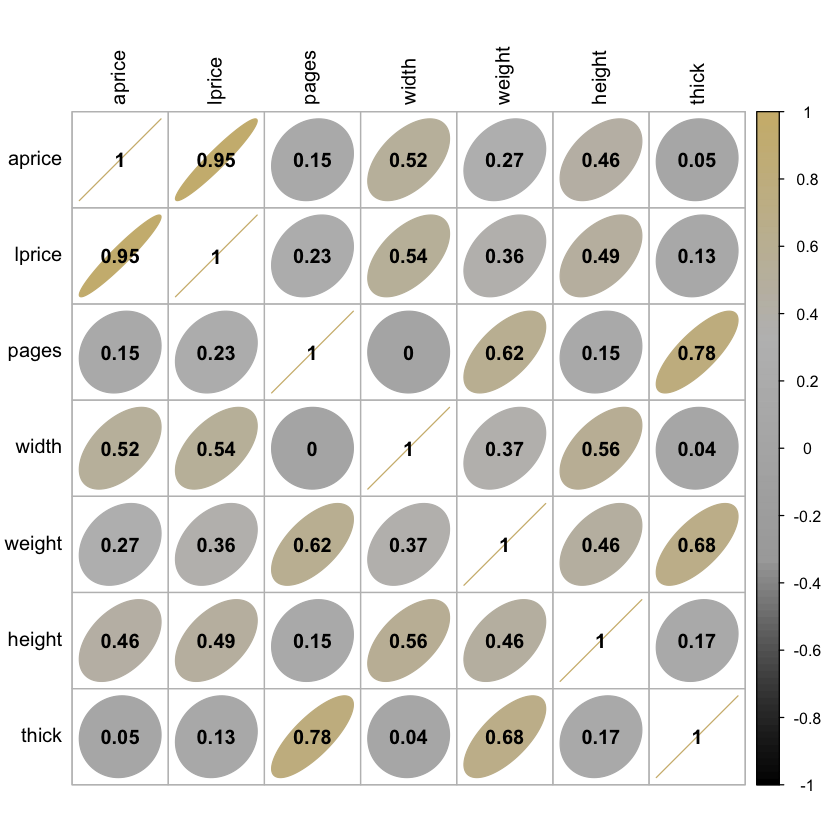

In [57]:
col4 = colorRampPalette(c("black", "darkgrey", "grey","#CFB87C"))
corrplot(cor(train[,-8]), method = "ellipse", col = col4(100),  addCoef.col = "black", tl.col = "black")

**PART A:** Fit a full model on the training dataset. Then, use the `update()` function to perform backward selection (let $\alpha_{crit} = 0.15$). At each step of backward selection, calculate the mean squared prediction error (MSPE) on the test set.

In [58]:
amazon = lm(aprice ~ ., data = train)
summary(amazon)


Call:
lm(formula = aprice ~ ., data = train)

Residuals:
     Min       1Q   Median       3Q      Max 
-20.1643  -1.8518  -0.4658   1.4417  21.3398 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -5.618859   2.975680  -1.888  0.06014 .  
lprice       0.862284   0.020365  42.342  < 2e-16 ***
pages       -0.003648   0.002843  -1.283  0.20055    
width        0.418865   0.376188   1.113  0.26658    
weight      -0.142183   0.060518  -2.349  0.01958 *  
height       0.148091   0.342243   0.433  0.66560    
thick        0.839125   1.397978   0.600  0.54889    
coverP       1.896960   0.678552   2.796  0.00558 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 3.827 on 251 degrees of freedom
Multiple R-squared:  0.9205,	Adjusted R-squared:  0.9183 
F-statistic: 415.1 on 7 and 251 DF,  p-value: < 2.2e-16


In [59]:
update_amazon = update(amazon, . ~ . -height)
summary(update_amazon)



Call:
lm(formula = aprice ~ lprice + pages + width + weight + thick + 
    cover, data = train)

Residuals:
     Min       1Q   Median       3Q      Max 
-20.0966  -1.8452  -0.4644   1.3964  21.2417 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -4.767100   2.227973  -2.140  0.03334 *  
lprice       0.864254   0.019817  43.611  < 2e-16 ***
pages       -0.003722   0.002833  -1.314  0.19013    
width        0.467540   0.358396   1.305  0.19324    
weight      -0.134970   0.058083  -2.324  0.02094 *  
thick        0.822290   1.395181   0.589  0.55614    
coverP       1.896906   0.677457   2.800  0.00551 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 3.821 on 252 degrees of freedom
Multiple R-squared:  0.9204,	Adjusted R-squared:  0.9185 
F-statistic: 485.8 on 6 and 252 DF,  p-value: < 2.2e-16


In [60]:
predictions1 <- predict(update_amazon, newdata = test)
mspe1 <- mean((test$aprice - predictions1)^2)
mspe1

[1] 9.229814

In [61]:
update_amazon = update(update_amazon, . ~ . -thick)
summary(update_amazon)



Call:
lm(formula = aprice ~ lprice + pages + width + weight + cover, 
    data = train)

Residuals:
     Min       1Q   Median       3Q      Max 
-20.5062  -1.7863  -0.4443   1.3825  21.3897 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -4.223593   2.025551  -2.085  0.03806 *  
lprice       0.861978   0.019412  44.404  < 2e-16 ***
pages       -0.002567   0.002044  -1.256  0.21023    
width        0.440531   0.354996   1.241  0.21577    
weight      -0.122917   0.054294  -2.264  0.02443 *  
coverP       1.701771   0.590278   2.883  0.00428 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 3.816 on 253 degrees of freedom
Multiple R-squared:  0.9203,	Adjusted R-squared:  0.9187 
F-statistic: 584.4 on 5 and 253 DF,  p-value: < 2.2e-16


In [62]:
predictions2 <- predict(update_amazon, newdata = test)
mspe2 <- mean((test$aprice - predictions2)^2)
mspe2

[1] 8.555423

In [63]:
update_amazon = update(update_amazon, . ~ . -width)
summary(update_amazon)



Call:
lm(formula = aprice ~ lprice + pages + weight + cover, data = train)

Residuals:
     Min       1Q   Median       3Q      Max 
-20.5460  -1.7807  -0.4809   1.2698  20.7516 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -1.918942   0.809428  -2.371  0.01850 *  
lprice       0.873961   0.016858  51.843  < 2e-16 ***
pages       -0.003391   0.001935  -1.753  0.08084 .  
weight      -0.100753   0.051327  -1.963  0.05074 .  
coverP       1.606029   0.585836   2.741  0.00655 ** 
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 3.82 on 254 degrees of freedom
Multiple R-squared:  0.9198,	Adjusted R-squared:  0.9186 
F-statistic: 728.5 on 4 and 254 DF,  p-value: < 2.2e-16


In [64]:
predictions3 <- predict(update_amazon, newdata = test)
mspe3 <- mean((test$aprice - predictions3)^2)
mspe3

[1] 8.109727

**PART B:** Check the standard diagnostic plots for this "best" model from Part A after the backward selection. Do you think this model satisfies the modeling assumptions?

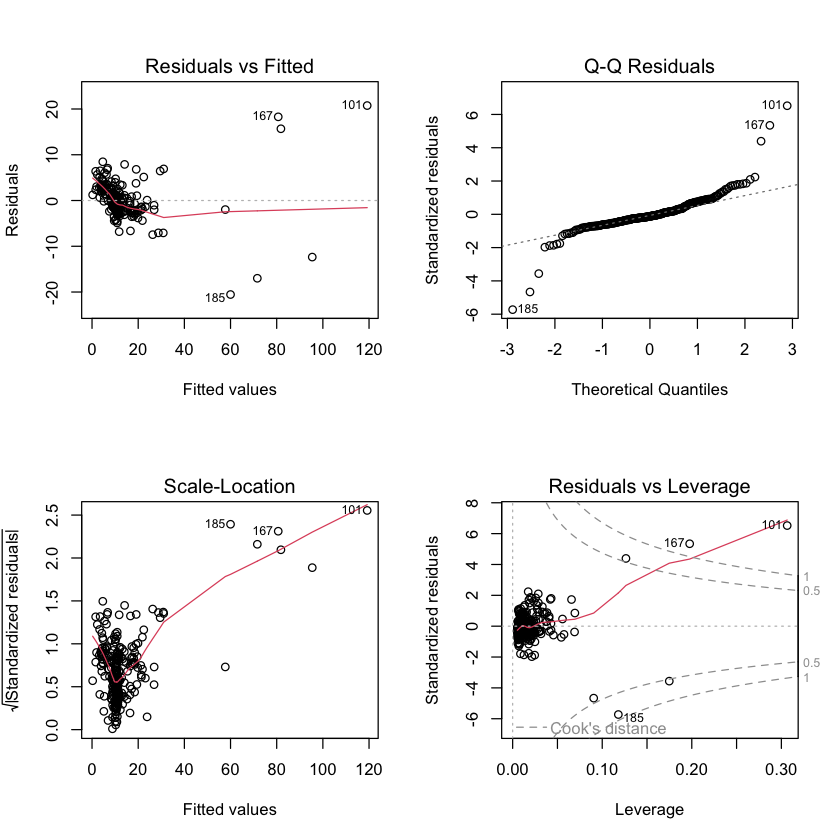

In [65]:
par(mfrow = c(2, 2))
plot(update_amazon)

The residuals are clustered around at the horizontal line at 0 and at fitted value =0. There are also outliers that are significantly farther away from the cluster like 167 and 101. This shows that the assumptions of linearity and homoscedasticity are not properly satisfied by the model.

This Q-Q plot is supposed to be a linear diagonal line for the model to satisfy the normality assumption. However, the plot deviates significantly at the tails from a normal diagonal plot which indicates that it might not satisfy the normality assumption.

This Scale-Location plot doesn't have evenly spread out data around the red regression line and also has several outliers. This plot can be used to further investigate homoscedasticity. The standardized residuals are spread out unevenly across the fitted values. It proves that the variance of the residuals is not constant across the range of fitted values. Hence, it is further prove of the unfitting assumption of homoscedasticity.

The Residuals vs Leverage plot above shows some high Cook's distances like at point 101 and 167. These can heavily influence the regression coefficients and the fit of the model.

**PART C:** Compare the MSPE for each of the models you fit along the way as you performed the backward selection.  Using MSPE as a criterion, which model is best? 

The third updated model has the best MSPE as it's the lowest (8.10972675716675). A model that has MSPE less than 10 is said to be an excellent model.

**PART D:** Now, compute the best model of size  1 , the best model of size  2 , etc. up through the best model of size 7  (the full model). Then, among the remaining  7  models, compute the best model according the AIC, BIC, and  𝑅2𝑎 . Do the criteria pick out different models? Which model do you think is best? Justify your answer.

In [66]:
library(leaps)

reg_sub = regsubsets(aprice ~ ., data = train)
reg_sub_sum = summary(reg_sub)
reg_sub_sum$which

,(Intercept),lprice,pages,width,weight,height,thick,coverP
1,TRUE,TRUE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
2,TRUE,TRUE,FALSE,FALSE,TRUE,FALSE,FALSE,FALSE
3,TRUE,TRUE,FALSE,FALSE,TRUE,FALSE,FALSE,TRUE
4,TRUE,TRUE,TRUE,FALSE,TRUE,FALSE,FALSE,TRUE
5,TRUE,TRUE,TRUE,TRUE,TRUE,FALSE,FALSE,TRUE
6,TRUE,TRUE,TRUE,TRUE,TRUE,FALSE,TRUE,TRUE
7,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE


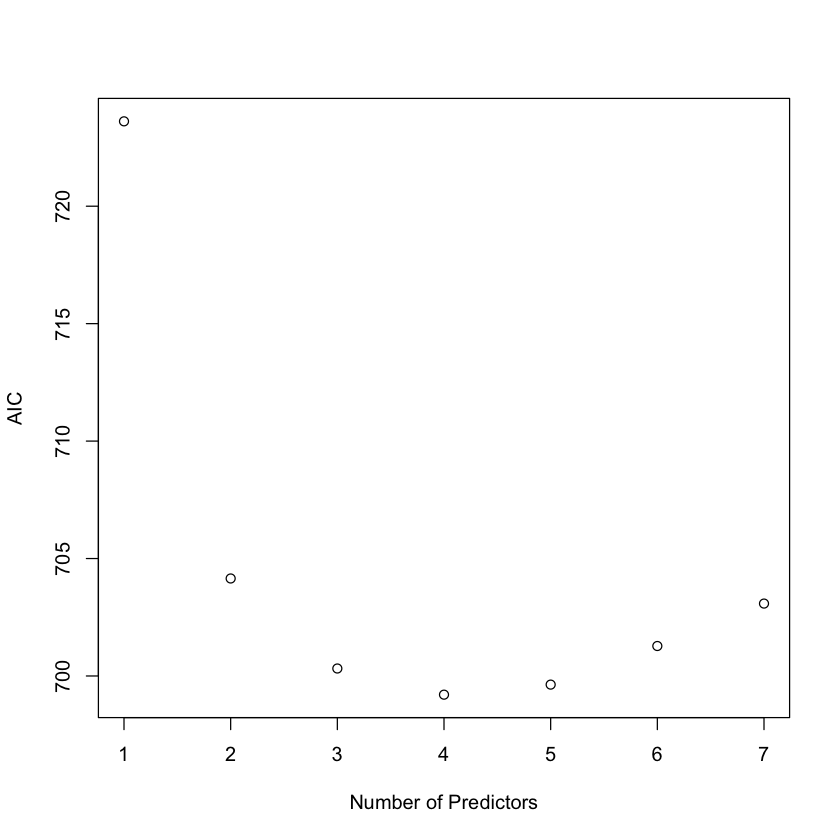

In [67]:
AIC = 2*(2:8) + n*log(reg_sub_sum$rss/n)
plot(AIC ~ I(1:7), xlab = "Number of Predictors", ylab = "AIC")

This plot shows that the model of size $ 4$ has the lowest AIC. Hence, the model selection is

`aprice` = $\widehat\beta_0 + \widehat\beta_1 \times$ `lprice` $ + \widehat\beta_2 \times$ `weight` $ + \widehat\beta_3 \times$ `coverP` + $\widehat\beta_4 \times$ `pages`

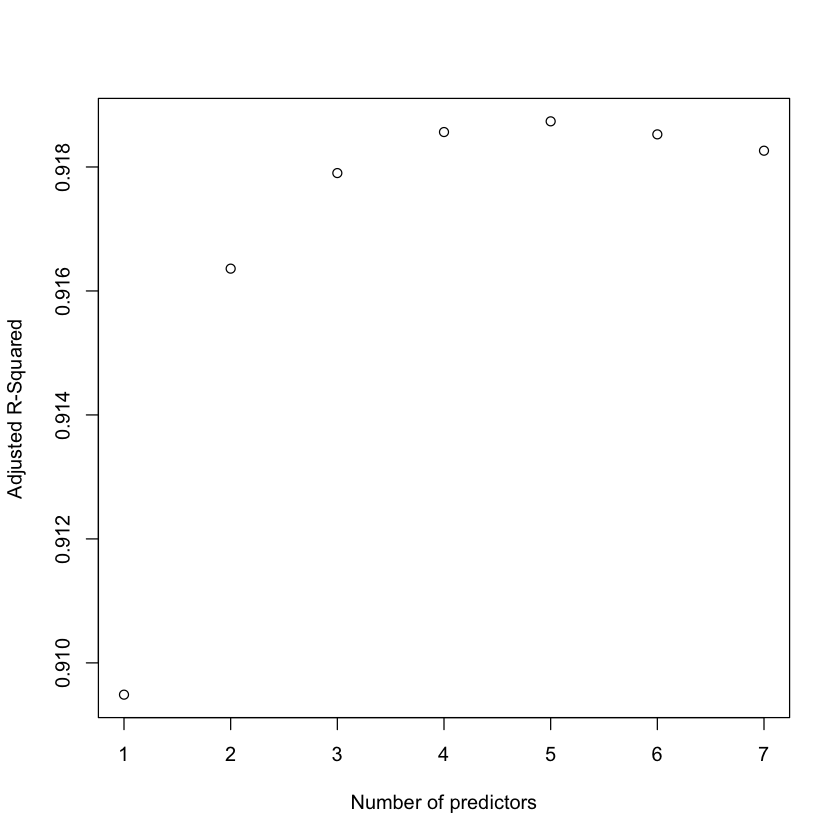

In [68]:
plot(1:7, reg_sub_sum$adjr2, xlab = "Number of predictors", ylab = "Adjusted R-Squared")

This plot shows that the model of size $ 5$ has the lowest $R_a^2$. Hence, the model selection is

`aprice` = $\widehat\beta_0 + \widehat\beta_1 \times$ `lprice` $ + \widehat\beta_2 \times$ `weight` $ + \widehat\beta_3 \times$ `coverP` + $\widehat\beta_4 \times$ `pages` + $\widehat\beta_5 \times$ `width`

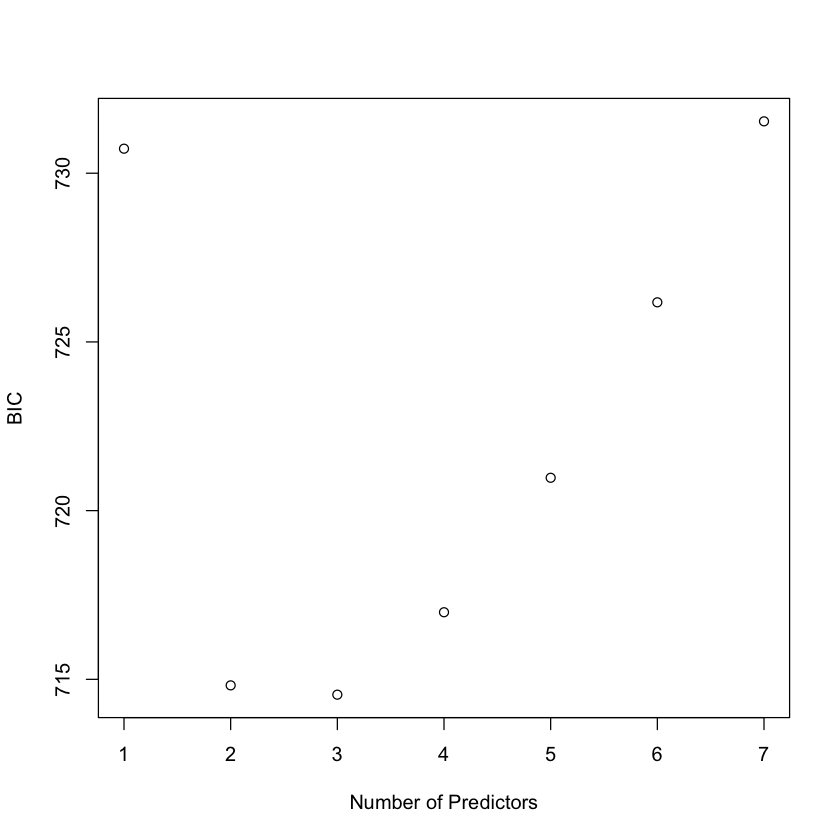

In [69]:
BIC = log(n)*(2:8) + n*log(reg_sub_sum$rss/n) 
plot(BIC ~ I(1:7), xlab = "Number of Predictors", ylab = "BIC")

This plot shows that the model of size $ 3$ has the lowest BIC. Hence, the model selection is

`aprice` = $\widehat\beta_0 + \widehat\beta_1 \times$ `lprice` $ + \widehat\beta_2 \times$ `weight` $ + \widehat\beta_3 \times$ `coverP`

Yes, all three criterias pick out different models. However, I think we should stick with the model that AIC predicts as AIC is a good metric to use for predictive models than BIC or the adjusted R square.

**PART E:** Compute the MSPE for each of the best models of size $1$, the best model of size $2$, etc. up through the best model of size $7$ (the full model). Which model is best according to this metric? Is this the same model that was selected by MSPE in part B.1 (c)?

You can either fit seven separate models **OR** automate this process in a function with a loop. If you choose to use a loop, consider the following:

1. The function should take in the training set, the test set, and the summary of your `regsubsets()` object (what we called `rs` in class).

2. The function should contain a loop. At step i = 1,...,p of the loop, you should:
    - select the training set model matrix corresponding the the best model of size i. You can do this using the logicals in the table given by `rs$which`.
    
    - fit the regression with the selected model matrix
    
    - select the test set matrix, xstar, of correct size i = 1,...,p. Again, you can do this using the logicals in the table given by `rs$which`.
    
    - compute the predicted value for the selected xstar
    
    - compute the MSPE 

In [70]:
# Code Here

cols <-  reg_sub_sum$which[2,]
test_data <- test[, cols]


calc_MSPE <- function(training, testing, reg_sub_sum_summary){
  p <- dim(training)[2] - 1              

  MSPE_vec <- numeric(p)
  for (i in 1:p) {
    
    y <- reg_sub_sum_summary$which[i, ]
    train_data <- training[, y]
    test_data <- testing[, y]

    model <- lm(aprice ~ ., data=train_data)
    prediction <- predict(model, newdata=test_data)
    sse <- (test_data$aprice - prediction)^2
    MSPE_vec[i] <- mean(sse)
  }
  return(MSPE_vec)
}

In [71]:
best_mspe <- calc_MSPE(training = train, testing = test, reg_sub_sum_summary = reg_sub_sum)
best_mspe
which.min(best_mspe)

[1] 10.610036  9.765210  8.703263  8.109727  8.555423  9.229814  9.358554

[1] 4

Hence, 4 has the best MSPE.

`aprice` = $\widehat\beta_0 + \widehat\beta_1 \times$ `lprice` $ + \widehat\beta_2 \times$ `weight` $ + \widehat\beta_3 \times$ `coverP` + $\widehat\beta_4 \times$ `pages`

Yes, this is the same model that was selected by MSPE in part B.1 (c).

**PART F:** Compute the variance inflation factor for the models selected by AIC, BIC, MSPE, and $R_a^2$. Do any of these models show evidence of collinearity?

In [72]:
# Code Here
update_amazon_aic = lm(aprice ~  lprice + cover + weight + pages, data = train)
vif(update_amazon_aic)
kappa(update_amazon_aic)
cor(model.matrix(update_amazon_aic)[,-1])

lprice    cover   weight    pages 
1.154429 1.179402 2.017828 1.689293

[1] 1819.702

,lprice,coverP,weight,pages
lprice,1.0000000,-0.16072439,0.3626808,0.22975562
coverP,-0.1607244,1.00000000,-0.3294875,-0.04242054
weight,0.3626808,-0.32948752,1.0000000,0.61558819
pages,0.2297556,-0.04242054,0.6155882,1.00000000


Since, the VIFs are all close to 1, it doesn't indicate multicollinearity. It implies that among these variables in our regression model, multicollinearity is not a serious concern.

In [73]:
# Code Here
update_amazon_rasq = lm(aprice ~  lprice + cover + weight + pages + width, data = train)
vif(update_amazon_rasq)
kappa(update_amazon_rasq)
cor(model.matrix(update_amazon_rasq)[,-1])

lprice    cover   weight    pages    width 
1.533993 1.199901 2.262691 1.888786 1.736615

[1] 3813.953

,lprice,coverP,weight,pages,width
lprice,1.0000000,-0.16072439,0.3626808,0.229755623,0.543287385
coverP,-0.1607244,1.00000000,-0.3294875,-0.042420537,-0.293131054
weight,0.3626808,-0.32948752,1.0000000,0.615588187,0.372212255
pages,0.2297556,-0.04242054,0.6155882,1.000000000,0.004244046
width,0.5432874,-0.29313105,0.3722123,0.004244046,1.000000000


Similarly, for this model too, the VIFs are all close to 1. So multicollinearity is not a serious concern with this model either.

In [74]:
# Code Here
update_amazon_bic = lm(aprice ~  lprice  + weight + cover, data = train)
vif(update_amazon_bic)
kappa(update_amazon_bic)
cor(model.matrix(update_amazon_bic)[,-1])

lprice   weight    cover 
1.153993 1.261089 1.124251

[1] 112.9595

,lprice,weight,coverP
lprice,1.0000000,0.3626808,-0.1607244
weight,0.3626808,1.0000000,-0.3294875
coverP,-0.1607244,-0.3294875,1.0000000


This model has better VIFs than the other two as the other two had 2 for weight. So, this suggests absolutely no multicollinearity.

## Problem 3 (15 points)

The following dataset containts measurements related to the impact of three advertising medias on sales of a product, $P$. The variables are:

- `youtube`: the advertising budget allocated to YouTube. Measured in thousands of dollars;

- `facebook`: the advertising budget allocated to Facebook. Measured in thousands of dollars; and 

- `newspaper`: the advertising budget allocated to a local newspaper. Measured in thousands of dollars.

- `sales`: the value in the $i^{th}$ row of the sales column is a measurement of the sales (in thousands of units) for product $P$ for company $i$.

The advertising data treat "a company selling product $P$" as the statistical unit, and "all companies selling product $P$" as the population. We assume that the $n = 200$ companies in the dataset were chosen at random from the population (a strong assumption!).

First, we load the data, plot it, and split it into a training set (`train_marketing`) and a test set (`test_marketing`).

    youtube          facebook       newspaper          sales      
 Min.   :  0.84   Min.   : 0.00   Min.   :  0.36   Min.   : 1.92  
 1st Qu.: 89.25   1st Qu.:11.97   1st Qu.: 15.30   1st Qu.:12.45  
 Median :179.70   Median :27.48   Median : 30.90   Median :15.48  
 Mean   :176.45   Mean   :27.92   Mean   : 36.66   Mean   :16.83  
 3rd Qu.:262.59   3rd Qu.:43.83   3rd Qu.: 54.12   3rd Qu.:20.88  
 Max.   :355.68   Max.   :59.52   Max.   :136.80   Max.   :32.40  

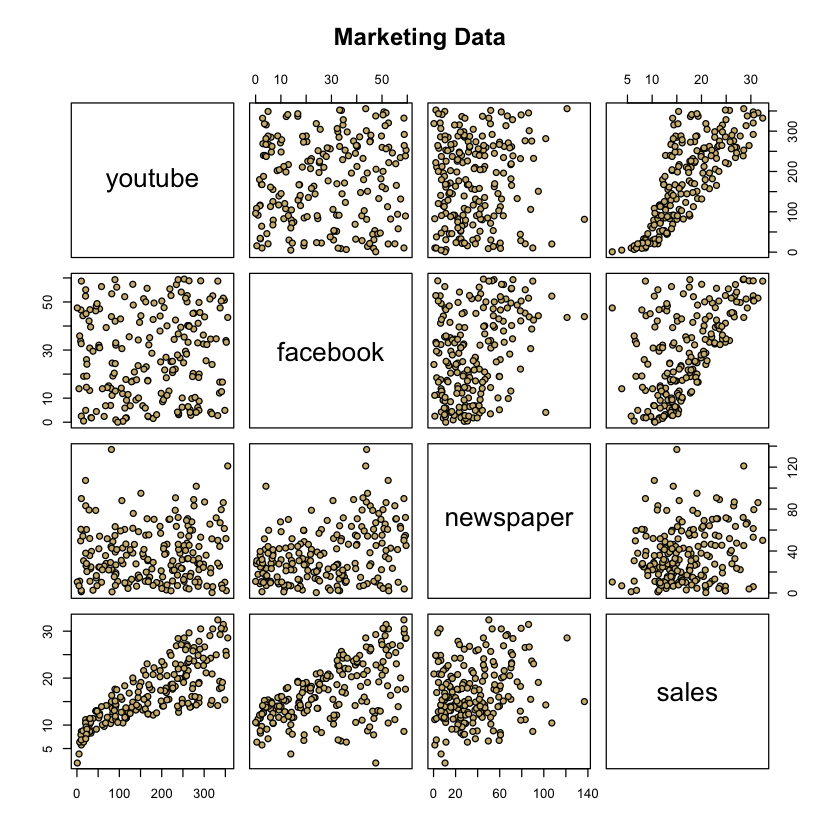

In [75]:
library(ggplot2)
library(mgcv)

marketing = read.csv("https://raw.githubusercontent.com/bzaharatos/-Statistical-Modeling-for-Data-Science-Applications/master/Modern%20Regression%20Analysis%20/Datasets/marketing.txt", sep = "")
summary(marketing)
pairs(marketing, main = "Marketing Data", pch = 21, 
      bg = c("#CFB87C"))

In [76]:
set.seed(1771) #set the random number generator seed.
n = floor(0.8 * nrow(marketing)) #find the number corresponding to 80% of the data
index = sample(seq_len(nrow(marketing)), size = n) #randomly sample indicies to be included in the training set

train_marketing = marketing[index, ] #set the training set to be the randomly sampled rows of the dataframe
test_marketing = marketing[-index, ] #set the testing set to be the remaining rows
dim(test_marketing) #check the dimensions
dim(train_marketing) #check the dimensions

[1] 40  4

[1] 160   4

**PART A:** Note that the relationship between `sales` and `youtube` is nonlinear. This was a problem for us earlier in the semester, when we modeled the data as if they were linear. For now, let's just focus on the relationship between `sales` and `youtube`, omitting the other variables (later, we will bring back other predictors).

Using the `train_marketing` set, plot `sales` (response) against `youtube` (predictor), and then fit and overlay a kernel regression. Experiment with the bandwidth parameter until the smooth looks appropriate, or comment why no bandwidth is ideal. Justify your answer.

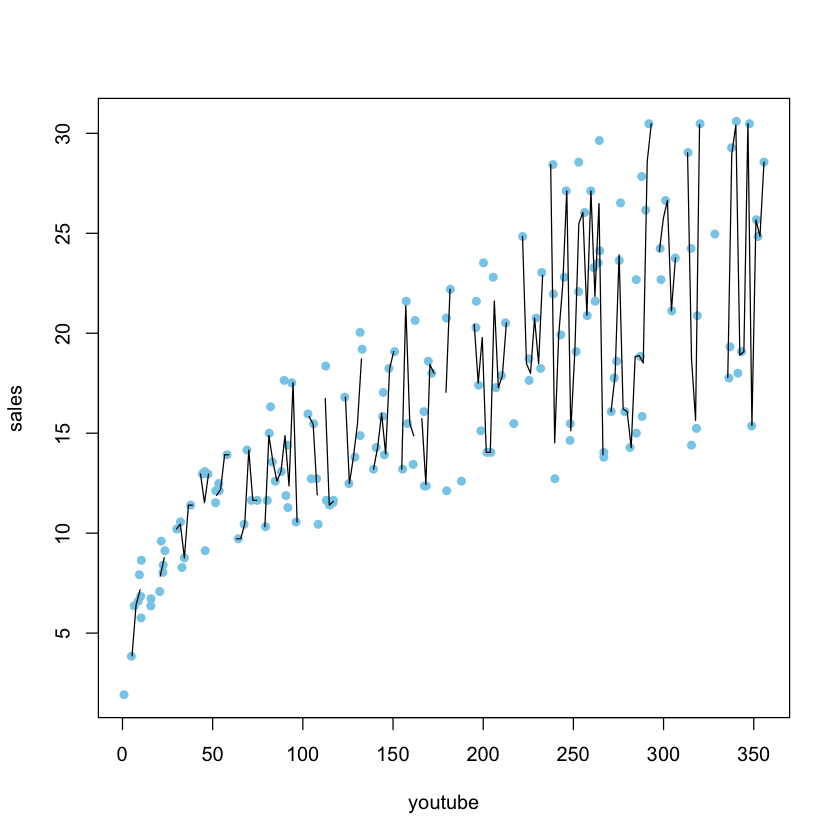

In [77]:
# Code Here
with(train_marketing,plot(sales~youtube, pch=16, col="skyblue"))
lines(ksmooth(train_marketing$youtube, train_marketing$sales, "normal", 1))

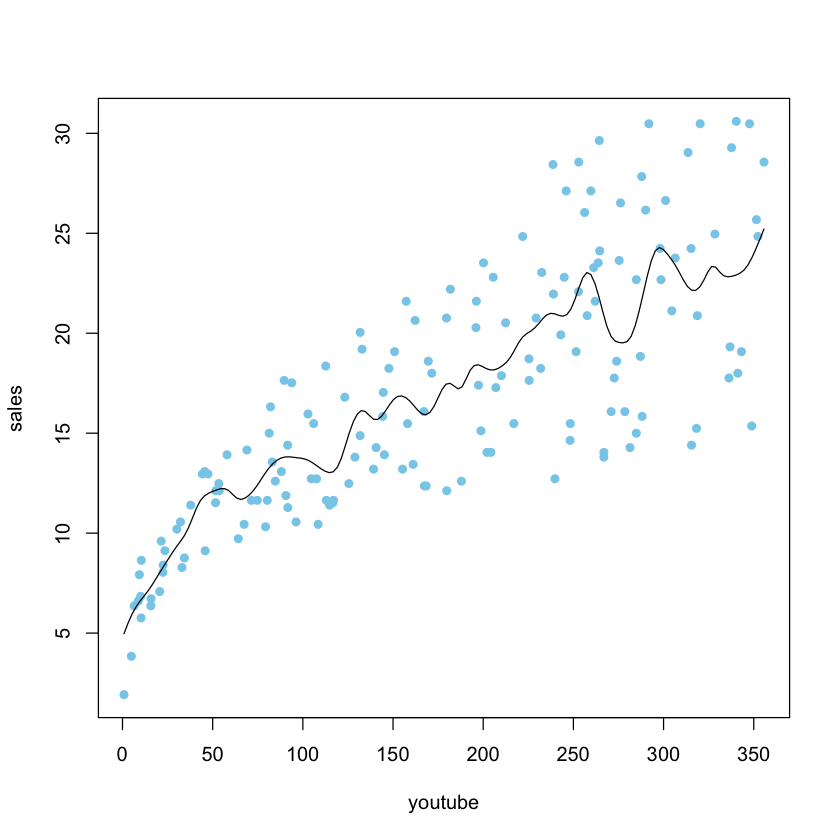

In [78]:
# Code Here
with(train_marketing,plot(sales~youtube, pch=16, col="skyblue"))
lines(ksmooth(train_marketing$youtube, train_marketing$sales, "normal", 15))

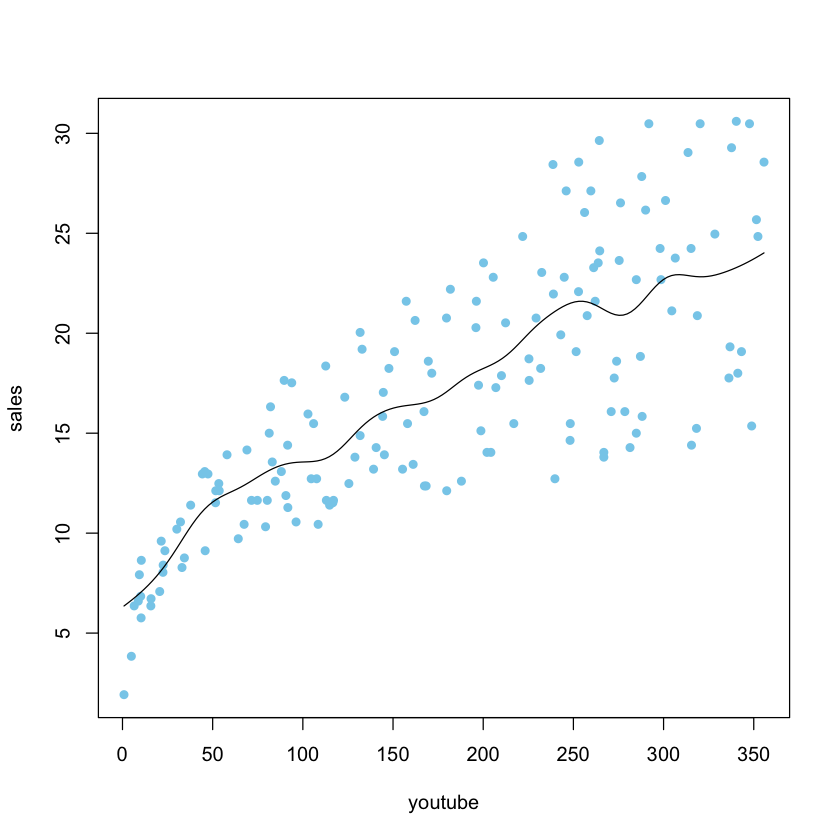

In [79]:
# Code Here
with(train_marketing,plot(sales~youtube, pch=16, col="skyblue"))
lines(ksmooth(train_marketing$youtube, train_marketing$sales, "normal", 35))

The first plot fits the data too much and gives into every little variance. It essentially overfits the data, whereas the the next one fits the data better. However, if you increase the bandwidth further, it'll probably underfit the data. The curve when the bandwidth parameter is 35 doesn't say necessarily anything meaningful about the data after point 200.

**PART B:** Compare the model fit on PART A with a standard linear regression model. Use the MSPE as your prediction metric on the `test_marketing` dataset. That is, calculate the MSPE for your kernel regressionand standard linear regression, and identify which model is best in terms of this metric.

Remember, the MSPE is given by 

\begin{align*}
MSPE = \frac{1}{k}\sum^k_{i=1}\left(y^\star_i - \widehat{y}^\star_i \right)^2 
\end{align*}

where $y^\star_i$ are the observed response values in the test set and $\widehat{y}^\star_i$ are the predicted values for the test set (using the model fit on the training set).

In [80]:
# Code Here
library(mgcv)
kernel_curve <- gam(sales ~ s(youtube), data = train_marketing, method = "REML")
kernel_sales <- predict(kernel_curve, newdata = test_marketing)

linear <- lm(sales ~ youtube, data = train_marketing)
linear_sales <- predict(linear, newdata = test_marketing)

MSPE_kernel <- mean((test_marketing$sales - kernel_sales)^2)
MSPE_linear <- mean((test_marketing$sales - linear_sales)^2)

print(paste("MSPE for Kernel Regression:", MSPE_kernel))
print(paste("MSPE for Linear Regression:", MSPE_linear))


[1] "MSPE for Kernel Regression: 17.5804712387851"
[1] "MSPE for Linear Regression: 17.1730453448197"


Both the models have almost the same MSPE, though Linear Regression (17.1730453448197) has a little bit better MSPE score than the Kernel (17.5804712387851) one. Hence, the Linear Regression model proves to be the best in terms of MSPE